# Random Forest

### Import libraries

In [63]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, ParameterGrid
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from pickle import dump

In [64]:
train_data = pd.read_csv("/workspaces/ml-proyect-random_forest/data/processed/train_x_sel_80.csv")
test_data = pd.read_csv("/workspaces/ml-proyect-random_forest/data/processed/test_x_sel_80.csv")

In [65]:
train_data.head()

Pregnancies  Glucose  SkinThickness   BMI  DiabetesPedigreeFunction   Age  \
0          1.0    153.0           42.0  40.6                     0.687  23.0   
1          0.0    102.0           40.0  34.5                     0.238  24.0   
2          0.0    137.0           27.0  27.3                     0.231  59.0   
3          1.0     87.0           27.0  34.6                     0.101  22.0   
4          0.0    140.0           26.0  42.6                     0.431  24.0   

   Outcome  
0        0  
1        0  
2        0  
3        0  
4        1

In [66]:
X_train = train_data.drop("Outcome", axis=1)
y_train = train_data["Outcome"]

X_test = test_data.drop("Outcome", axis=1)
y_test = test_data["Outcome"]


## Random Forest model

In [67]:
model = RandomForestClassifier(random_state = 24)
model.fit(X_train, y_train)

#Save model
dump(model, open("/workspaces/ml-proyect-random_forest/models/model_random_forest.pk", "wb"))

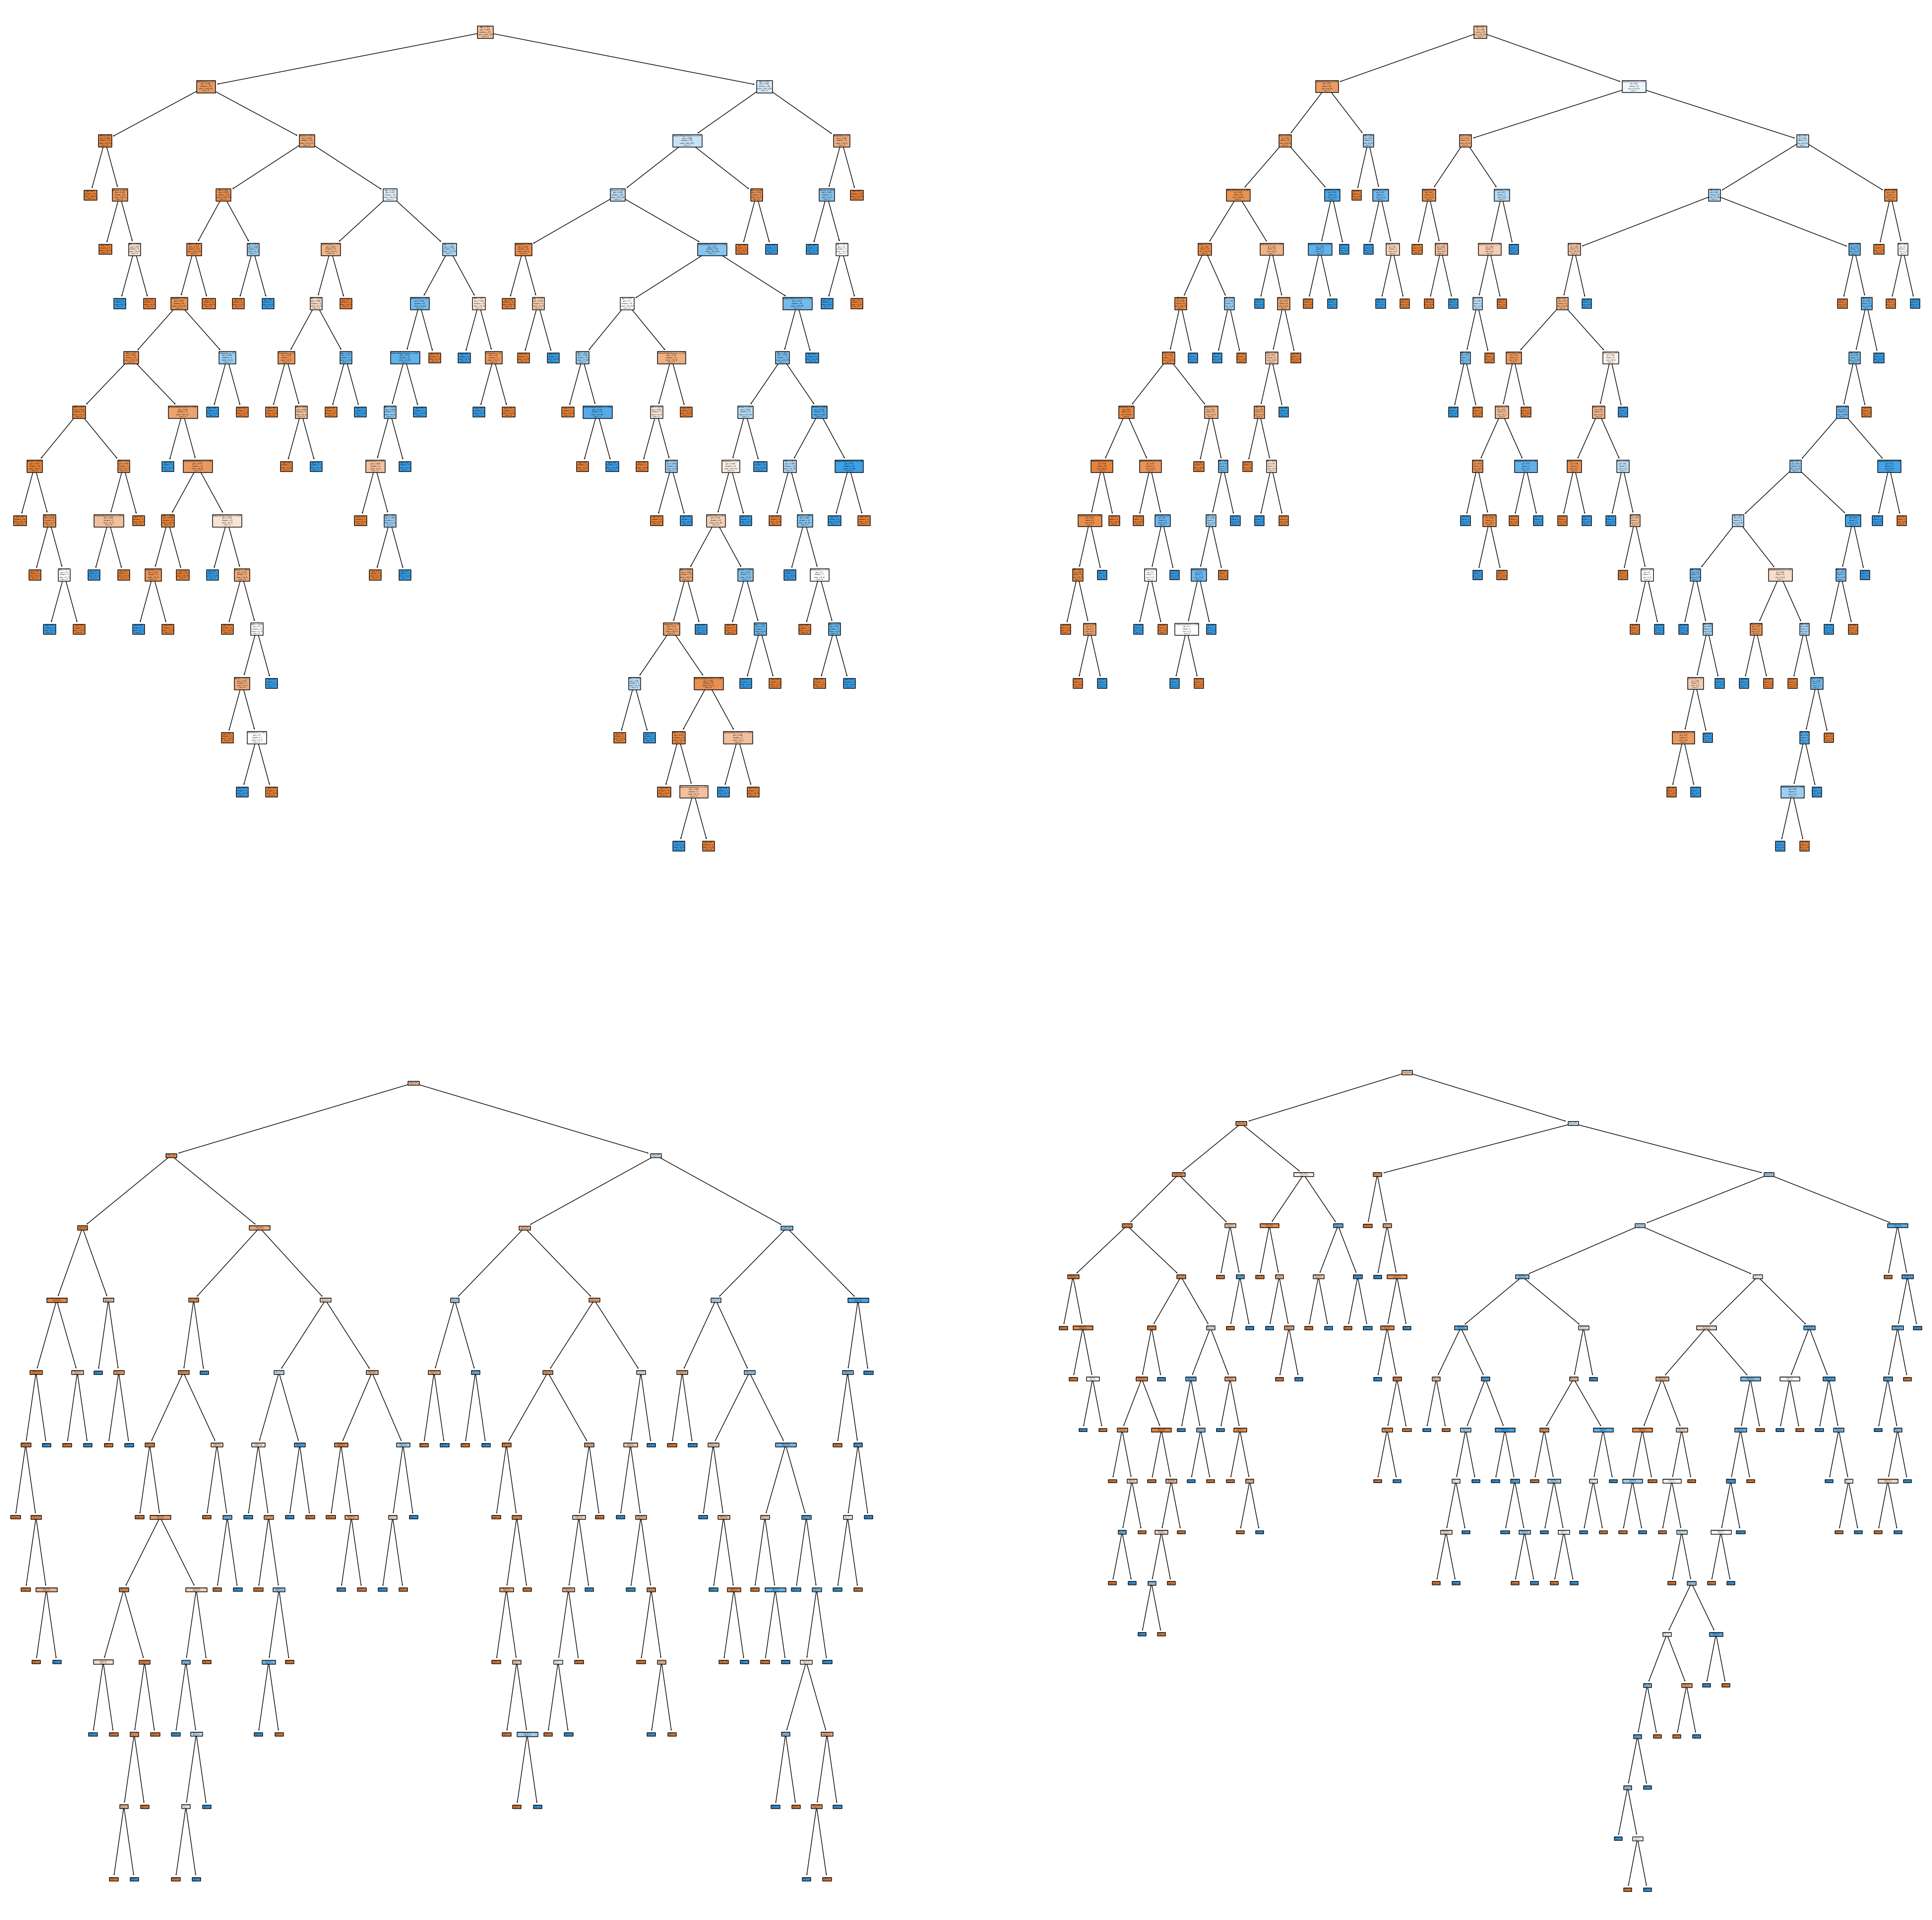

In [68]:
fig, axis = plt.subplots(2, 2, figsize = (50, 50))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)


plt.show()

### Train

In [69]:
y_pred = model.predict(X_train)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [70]:
accuracy_score(y_train, y_pred)

1.0

### Test

In [71]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [72]:
accuracy_score(y_test, y_pred)

0.7662337662337663

### Confusion matrix

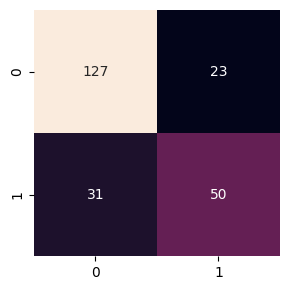

In [73]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [74]:
hyperparams = {
    "n_estimators": np.arange(2, 40, 10),
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": np.append(np.arange(3, 30, 15), None),
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
    "random_state": [24],
    "class_weight": ["balanced", "balanced_subsample"]
}

## GridSearch

In [75]:
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=24),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([3, 18, None], dtype=object),
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': array([ 2, 12, 22, 32]),
                         'random_state': [24]},
             scoring='accuracy')

In [76]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=24),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([3, 18, None], dtype=object),
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': array([ 2, 12, 22, 32]),
                         'random_state': [24]},
             scoring='accuracy')

In [77]:
grid.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 22,
 'random_state': 24}

In [78]:
best_model= grid.best_estimator_

#Save model
dump(best_model, open("/workspaces/ml-proyect-random_forest/models/best_model_gs.pk", "wb"))

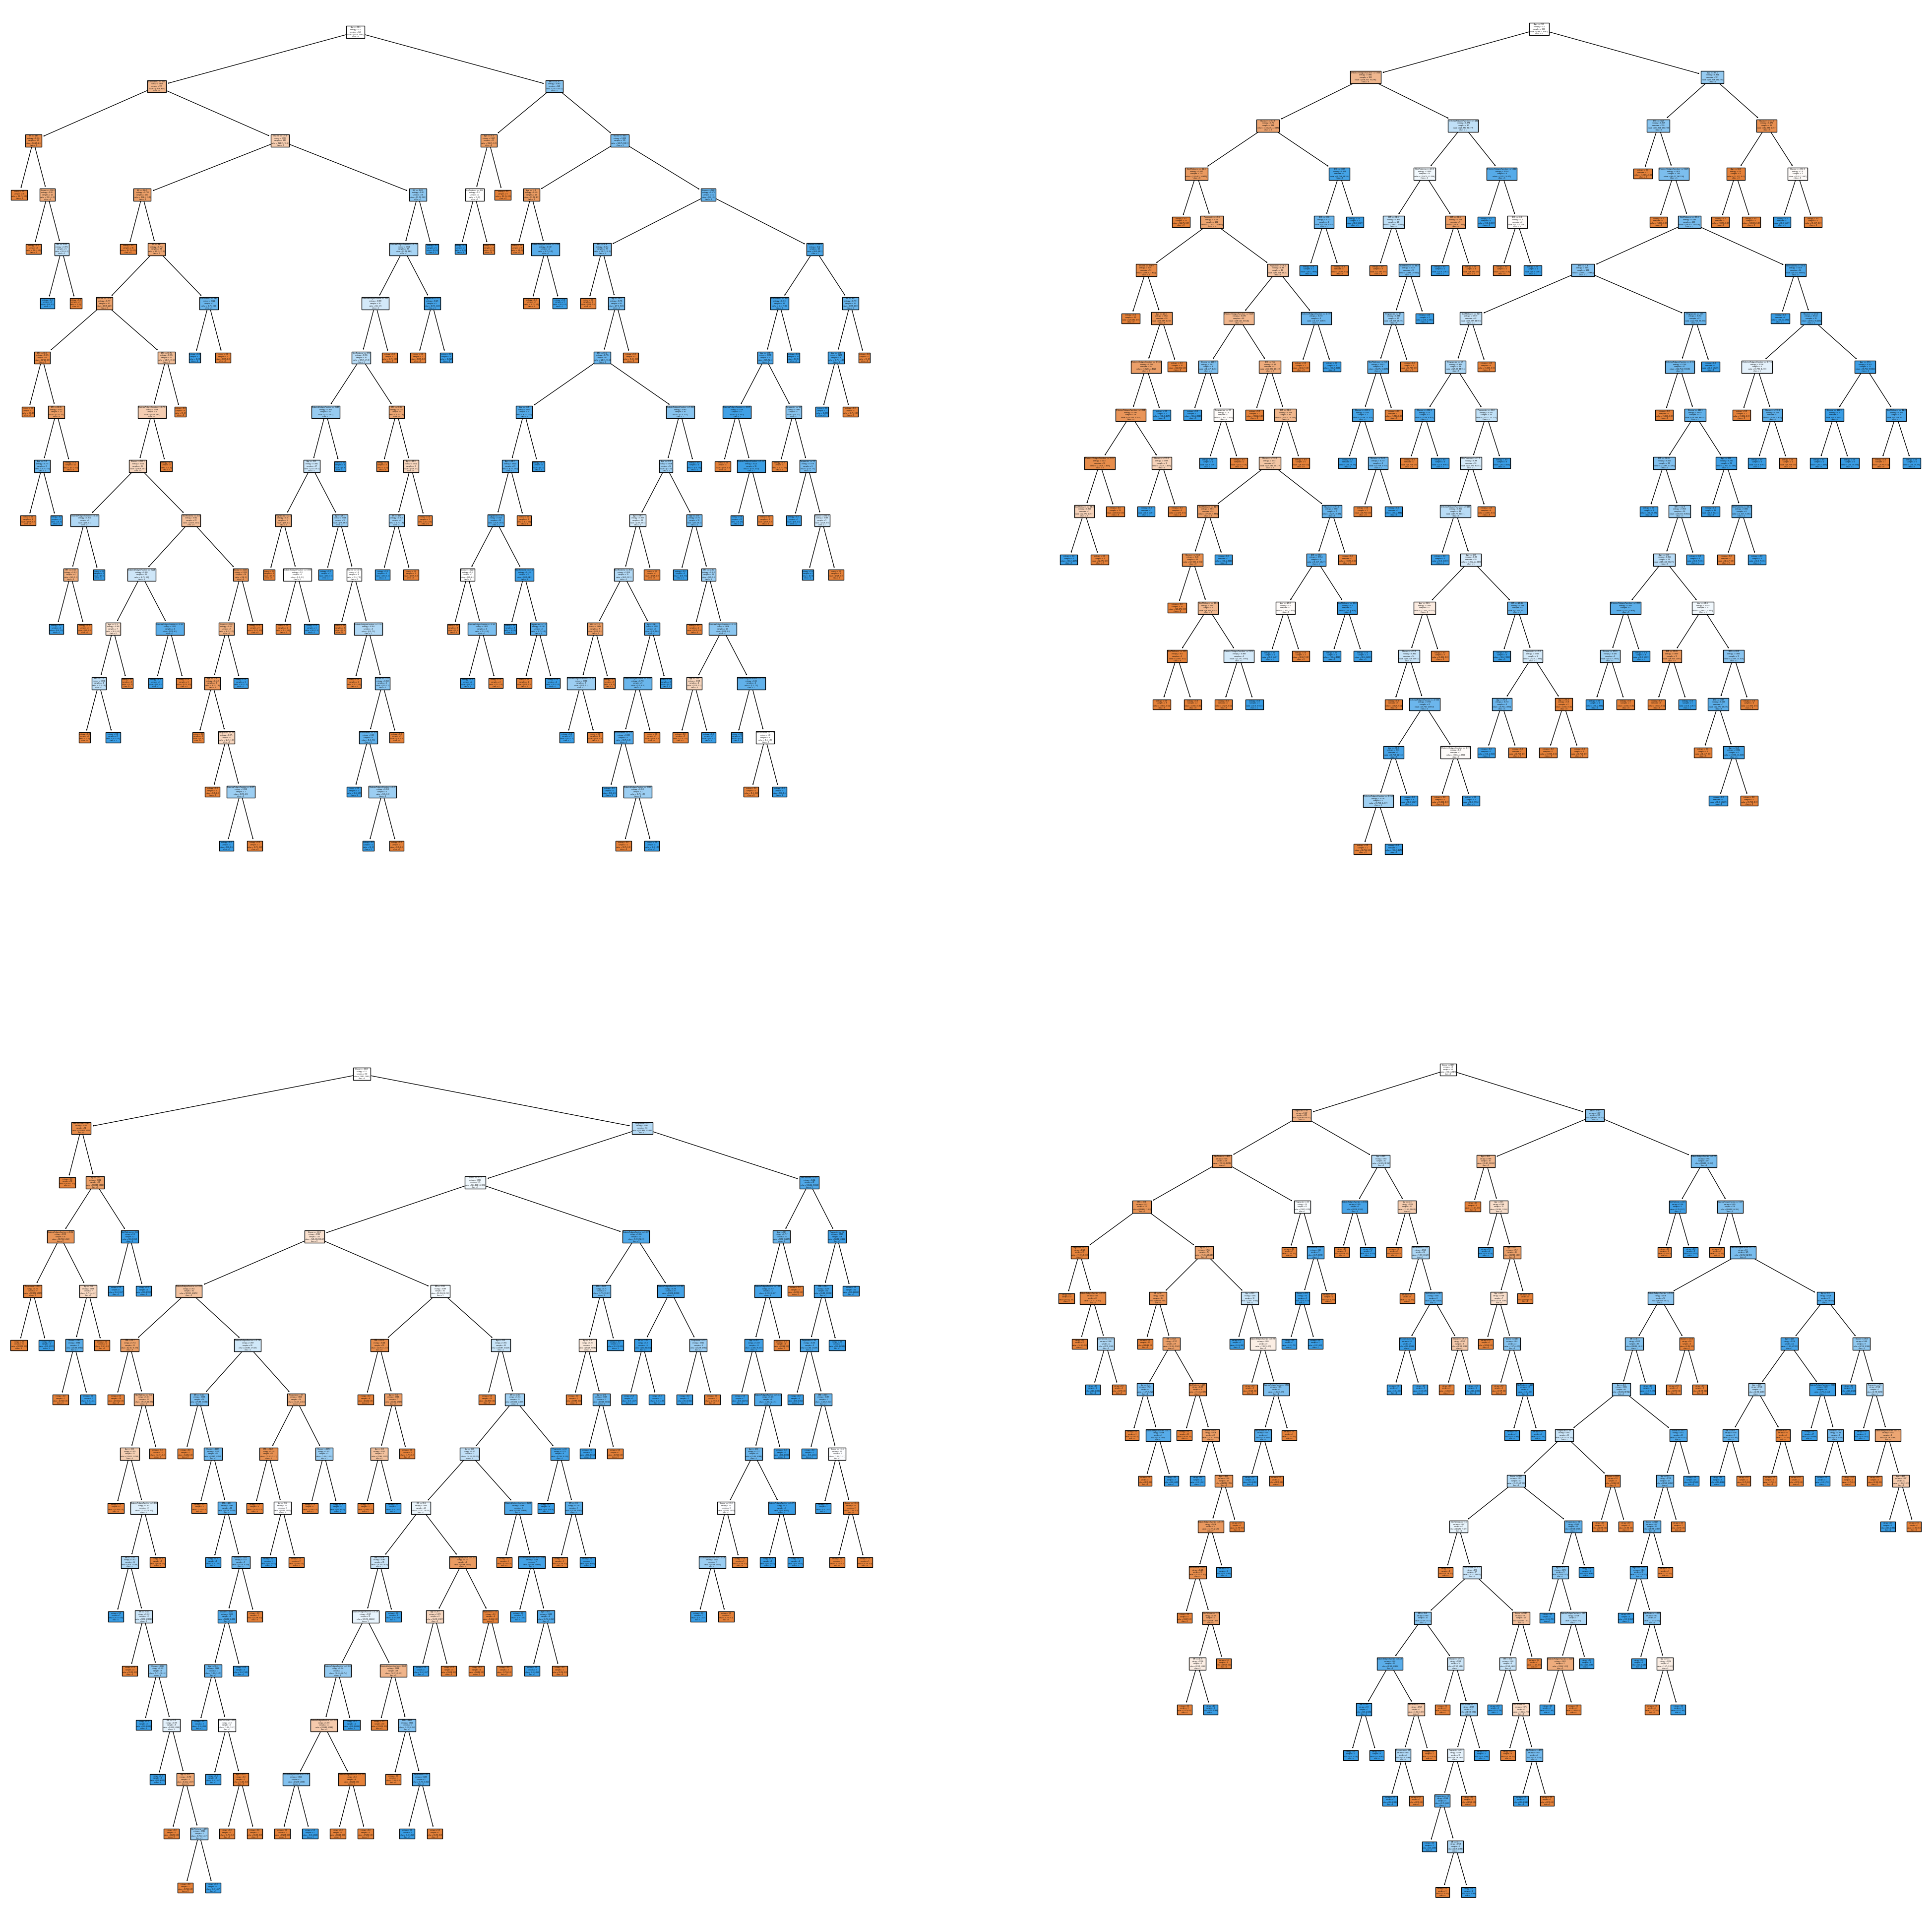

In [79]:
fig, axis = plt.subplots(2, 2, figsize = (50, 50))

tree.plot_tree(best_model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best_model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best_model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best_model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)


plt.show()

In [80]:
best_model

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=22, random_state=24)

In [81]:
best_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=22, random_state=24)

### Train

In [82]:
y_pred = best_model.predict(X_train)

In [83]:
accuracy_score(y_train, y_pred)

0.9962756052141527

### Test

In [84]:
y_pred = best_model.predict(X_test)

In [85]:
accuracy_score(y_test, y_pred)

0.7445887445887446

### Confusion matrix

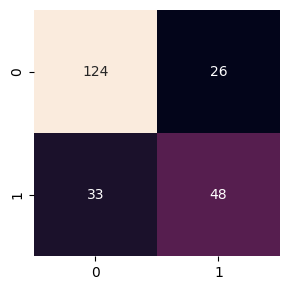

In [86]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

## ParameterGrid

In [87]:
accs = []
for combination in ParameterGrid(hyperparams):
    model = RandomForestClassifier(**combination)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accs.append(accuracy_score(y_train, y_pred))

best_acc = max(accs)
best_combination = list(ParameterGrid(hyperparams))[accs.index(best_acc)]
best_model = RandomForestClassifier(**best_combination)
best_model.fit(X_train, y_train)

# Save model
dump(best_model, open("/workspaces/ml-proyect-random_forest/models/best_model_pg.pk", "wb"))

best_combination

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'sqrt',
 'n_estimators': 22,
 'random_state': 24}

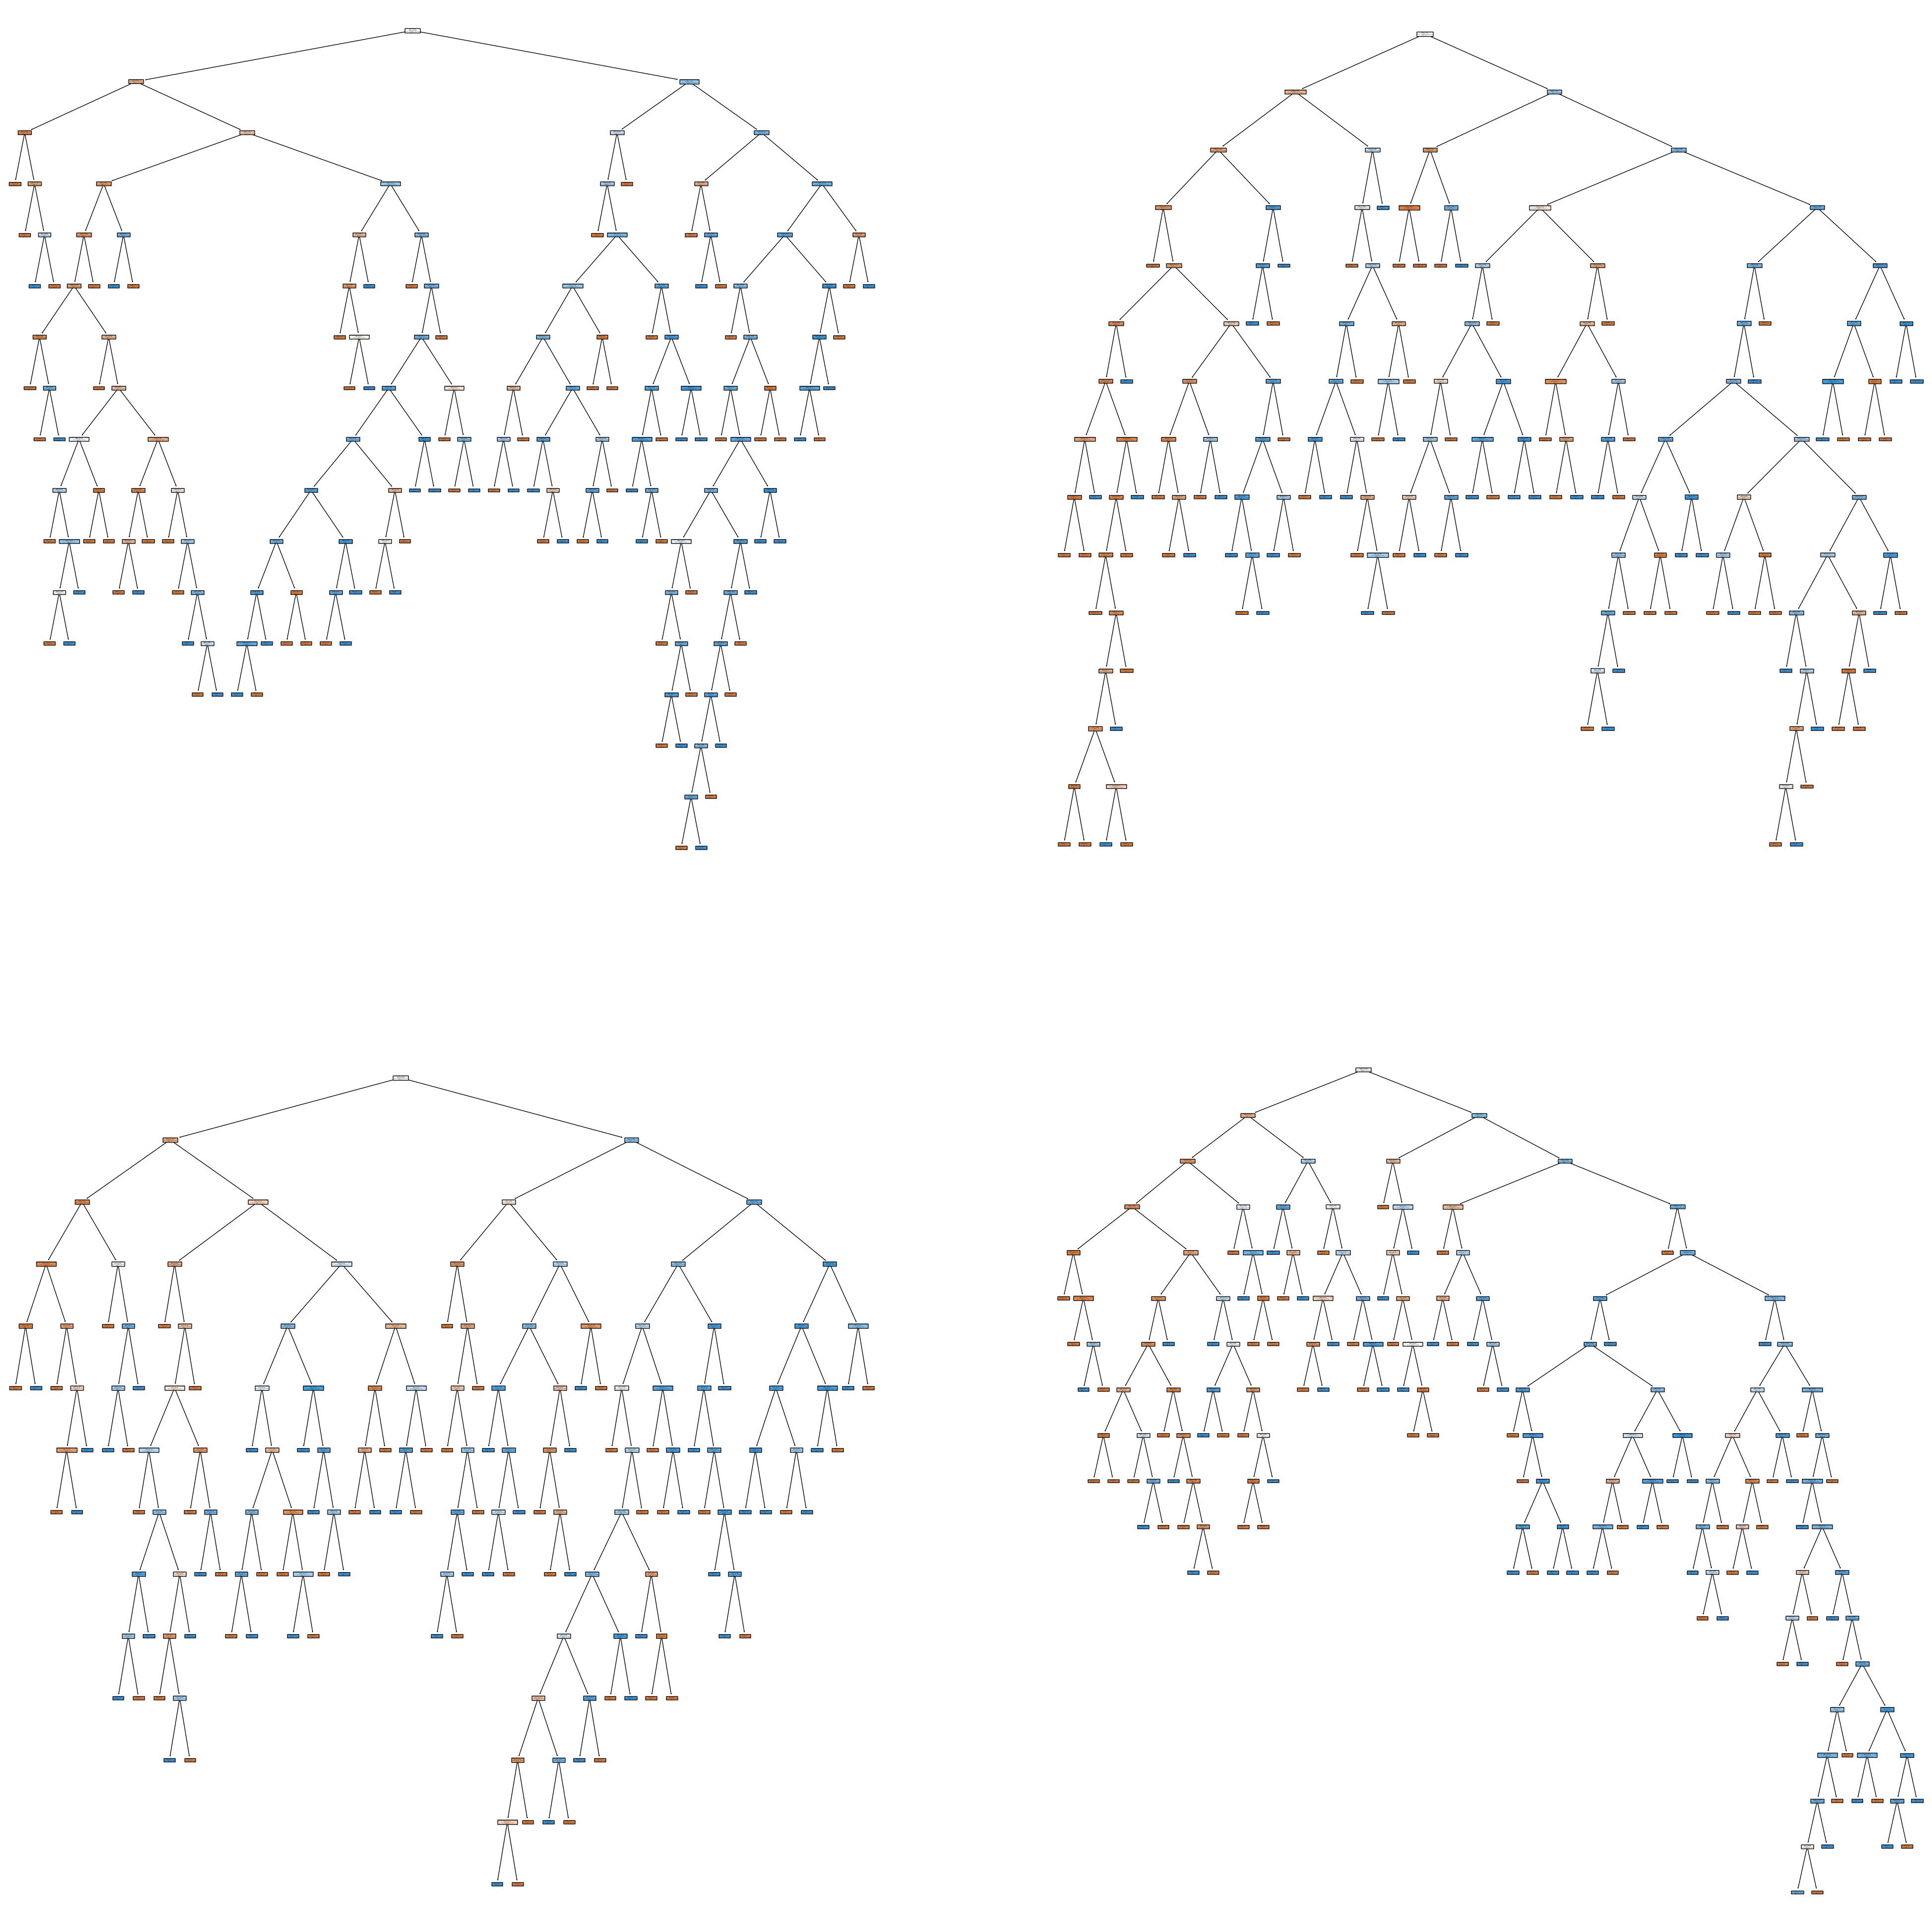

In [88]:
fig, axis = plt.subplots(2, 2, figsize = (50, 50))

tree.plot_tree(best_model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best_model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best_model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best_model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)


plt.show()

### Train

In [89]:
y_pred = best_model.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

### Test

In [90]:
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

### Confusion matrix

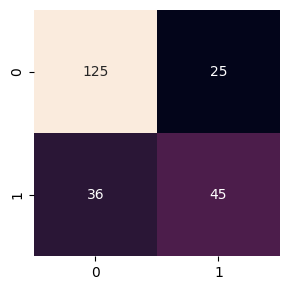

In [91]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

### Conclusion:

After conducting the previous exercise involving a DecisionTree model and comparing the results with the RandomForest model once optimized with hyperparameters, we can confirm that our best model is the 'best_model_pg.pk' with a 100% accuracy in the training set and 73.59% in the test set